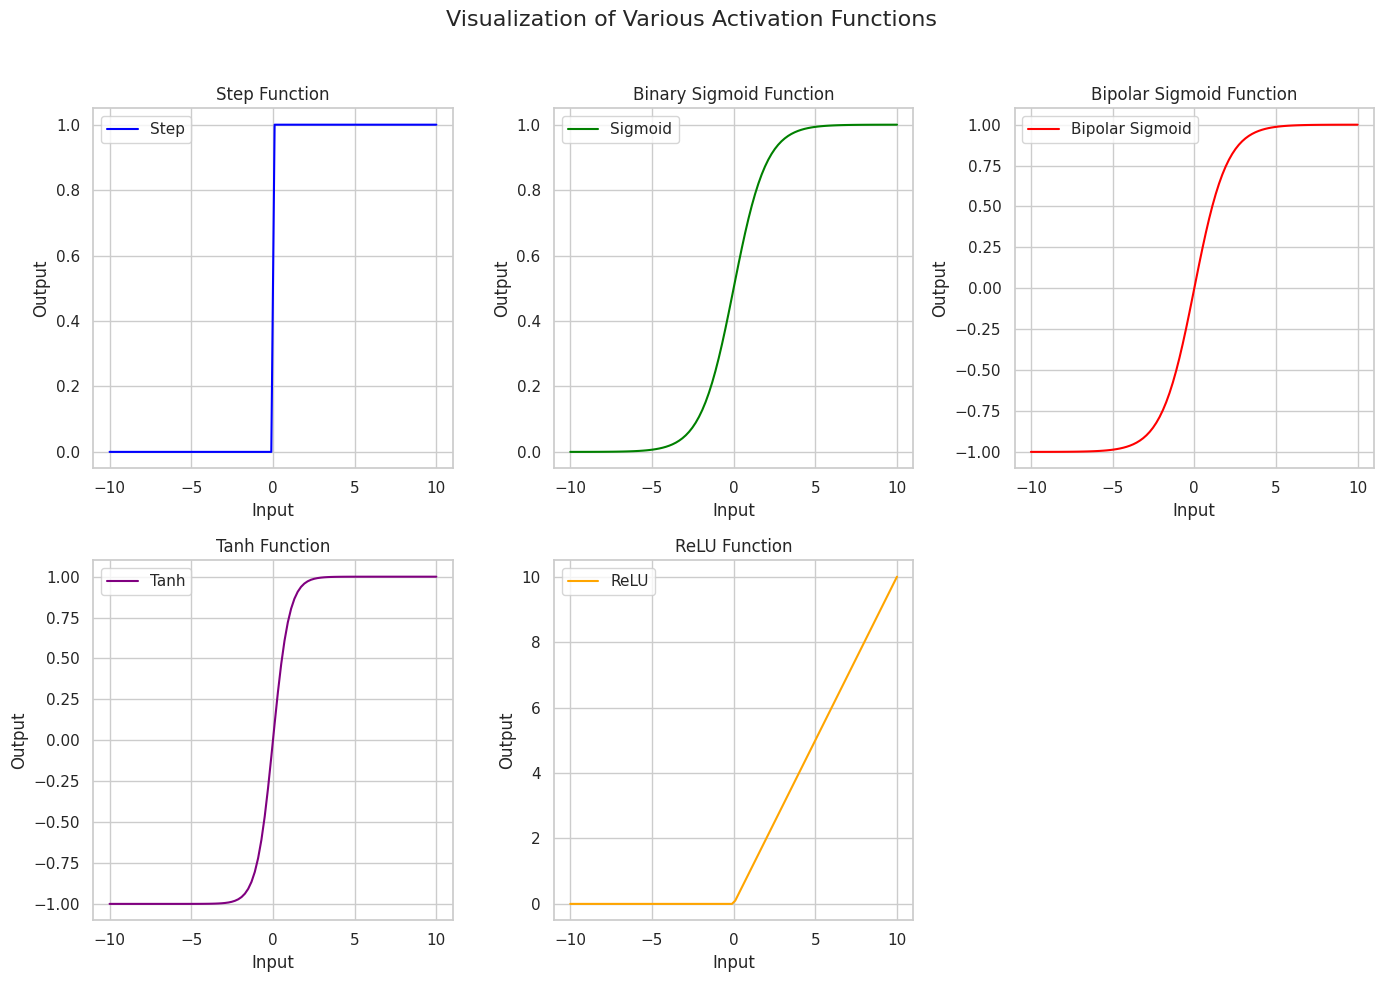

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn theme for better aesthetics
sns.set(style='whitegrid')

# Activation Functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Visualization of Activation Functions
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(14, 10))
plt.suptitle('Visualization of Various Activation Functions', fontsize=16)

# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x), color='blue', label='Step')
plt.title('Step Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# Sigmoid Function
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x), color='green', label='Sigmoid')
plt.title('Binary Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# Bipolar Sigmoid Function
plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid(x), color='red', label='Bipolar Sigmoid')
plt.title('Bipolar Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh(x), color='purple', label='Tanh')
plt.title('Tanh Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu(x), color='orange', label='ReLU')
plt.title('ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Activation: sigmoid, Train Accuracy: 0.9833, Test Accuracy: 1.0000
Activation: tanh, Train Accuracy: 0.9917, Test Accuracy: 1.0000
Activation: relu, Train Accuracy: 0.9833, Test Accuracy: 1.0000


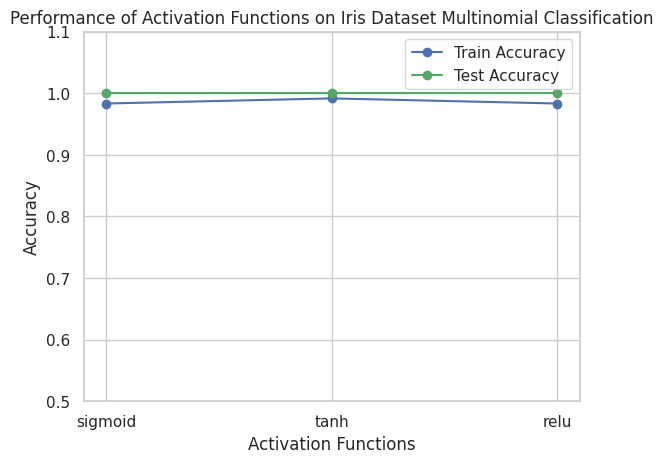

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Invalid activation function")

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate=0.01):
        # Backward pass
        output_error = y - output  # Error in output
        output_delta = output_error

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.activation_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, output_delta) * learning_rate
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 += np.dot(X.T, hidden_delta) * learning_rate
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.01):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Evaluate neural network performance
def evaluate(nn, X, y):
    predictions = nn.predict(X)
    true_labels = np.argmax(y, axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Initialize model configurations
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activations:
    nn = SimpleNN(input_size=4, hidden_size=5, output_size=3, activation=activation)
    nn.train(X_train, y_train, epochs=10000, learning_rate=0.01)
    train_accuracy = evaluate(nn, X_train, y_train)
    test_accuracy = evaluate(nn, X_test, y_test)
    results[activation] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
    print(f"Activation: {activation}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

activations_list = list(results.keys())
train_accuracies = [results[act]['Train Accuracy'] for act in activations_list]
test_accuracies = [results[act]['Test Accuracy'] for act in activations_list]

plt.plot(activations_list, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', color='b')
plt.plot(activations_list, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='g')

plt.title("Performance of Activation Functions on Iris Dataset Multinomial Classification")
plt.ylabel("Accuracy")
plt.xlabel("Activation Functions")
plt.ylim(0.5, 1.1)
plt.legend()
plt.show()
